In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report

## Loading dataset which has the clusters created by lda and sentiment score given by BERT

In [2]:
# loading dataset which has the clusters created by lda and sentiment score given by BERT
datasenti1 = pd.read_excel('merged_df_final365.xlsx',index_col=0) # Columns: 'word1', 'word2', 'word3', 'word4', 'value1', 'value2', 'value3', 'value4', 'stock_price'

columns_to_drop1 = ['Open', 'High','Low','Vol.','Change %']
df_dropped1 = datasenti1.drop(columns=columns_to_drop1)

# Removes the rows with null values to avoid ambigous results
df_dropped1=df_dropped1.dropna()
df_dropped1['High_Low'] = df_dropped1['Price_Diff'].apply(
    lambda x: 'VeryHigh' if x > 150 
             else ('High' if x > 40 
                   else ('Low' if x > 0 
                         else 'VerLow'))
)
display(df_dropped1)


,unique_dates,cluster1,sentiment1,cluster2,sentiment2,cluster3,sentiment3,cluster4,sentiment4,cluster5,...,sentiment6,cluster7,sentiment7,cluster8,sentiment8,date_next,Date,Price,Price_Diff,High_Low
3,2010-01-04,"['new', 'one', 'years', 'looks', 'back', 'brin...",0.951007,"['one', 'billion', 'monday', 'dinner', 'deal',...",0.916227,"['news', 'new', 'theater', 'first', 'bank', 'm...",0.961560,"['monday', 'new', 'one', 'years', '2009', 'can...",0.924694,"['new', 'season', 'chef', 'like', 'people', 'l...",...,0.961803,"['monday', 'new', 'editor', 'president', 'may'...",0.954347,"['new', 'said', 'monday', 'american', 'one', '...",0.946520,2010-01-05,2010-01-05,1136.52,3.53,Low
4,2010-01-05,"['monday', 'tuesday', 'said', 'one', 'two', 'l...",0.924125,"['new', 'said', 'year', 'years', 'spring', 'ob...",0.936708,"['new', 'group', 'monday', 'estate', 'manhatta...",0.946444,"['would', 'times', 'tuesday', 'first', 'new', ...",0.927646,"['tuesday', 'would', 'house', 'new', 'two', 'y...",...,0.942967,"['two', 'year', 'new', 'first', 'times', 'part...",0.952357,"['new', 'said', 'kirkus', 'company', 'year', '...",0.925140,2010-01-06,2010-01-06,1137.14,0.62,Low
5,2010-01-06,"['theater', 'new', 'year', 'bank', 'broadway',...",0.959782,"['new', 'york', 'tuesday', 'business', 'years'...",0.928863,"['tuesday', 'chicago', 'philharmonic', 'said',...",0.933655,"['years', 'year', 'new', 'reported', 'since', ...",0.944925,"['new', 'said', 'wednesday', 'york', 'court', ...",...,0.931181,"['dodd', 'new', 'christopher', 'j', 'senator',...",0.925956,"['wednesday', 'said', 'film', 'new', 'one', 'n...",0.907120,2010-01-07,2010-01-07,1141.69,4.55,Low
6,2010-01-07,"['editor', 'said', 'new', 'chief', 'wednesday'...",0.963367,"['united', 'part', 'game', 'former', 'show', '...",0.925148,"['year', 'new', 'show', 'network', 'first', 't...",0.944333,"['new', 'million', 'years', 'would', 'wednesda...",0.944738,"['new', 'enron', 'said', 'thursday', 'wednesda...",...,0.926186,"['new', 'thursday', 'week', 'sales', 'year', '...",0.931883,"['new', 'wednesday', 'show', 'united', 'presid...",0.950117,2010-01-08,2010-01-08,1144.98,3.29,Low
9,2010-01-10,"['said', 'whitestone', 'st', 'new', 'yemen', '...",0.938995,"['sunday', 'last', 'article', 'mohammed', 'con...",0.982015,"['runs', 'rbi', '2000s', 'sunday', 'last', 'ho...",0.945038,"['four', 'editor', 'players', 'minutes', 'game...",0.933748,"['kennedy', 'aug', 'tenure', 'correction', 'ho...",...,0.905058,"['new', 'game', 'million', 'debt', 'billion', ...",0.963673,"['last', 'new', 'look', 'city', 'million', 'nb...",0.949471,2010-01-11,2010-01-11,1146.98,2.00,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2010-12-26,"['katherine', 'became', 'hesitant', 'severely'...",0.910836,"['new', 'state', 'economic', 'traditions', 'ne...",0.919576,"['new', 'sunday', 'pool', 'two', 'thousands', ...",0.939512,"['world', 'womens', 'chess', 'game', 'leader',...",0.963695,"['new', 'holiday', 'season', 'bag', 'lebron', ...",...,0.937706,"['morgan', 'prime', 'dugger', 'speaks', 'celia...",0.873282,"['hunter', 'bounty', 'sunday', 'night', 'two',...",0.941627,2010-12-27,2010-12-27,1257.54,0.77,Low
360,2010-12-27,"['sunday', 'american', 'new', 'worth', 'presid...",0.969076,"['new', 'companies', 'one', 'packers', 'giants...",0.965007,"['travel', 'belly', 'bills', '20', 'years', 'a...",0.901583,"['new', 'governor', 'jersey', 'common', 'york'...",0.913214,"['monday', 'new', 'federal', 'city', 'progress...",...,0.914697,"['week', 'new', 'people', 'coast', 'may', 'tat...",0.942427,"['third', 'two', 'united', 'take', 'states', '...",0.976335,2010-12-28,2010-12-28,1258.51,0.97,Low
361,2010-12-28,"['new', 'three', 'monday', 'major', 'year', 'a...",0.957432,"['another', 'also', 'helping', 'like', 'banks'...",0.953768,"['weather', 'million', 'would', 'schedule', 'm...",0.919807,"['would', 'could', 'snow', 'season', 'monday',...",0.881583,"['new', 'york', 'photographs', 'wants', 'last'...",...,0.898082,"['n

C:\Users\dell\AppData\Local\Temp\ipykernel_52280\3918780891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_dropped1.corr()


,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,Price,Price_Diff
sentiment1,1.000000,0.005791,0.072068,-0.153040,-0.008988,-0.051142,-0.022434,-0.034520,-0.092713,0.002560
sentiment2,0.005791,1.000000,-0.060496,-0.068280,-0.020838,-0.041872,0.023185,0.035455,-0.035809,-0.048734
sentiment3,0.072068,-0.060496,1.000000,0.088995,0.006935,-0.120494,0.015519,0.033001,-0.084041,0.086644
sentiment4,-0.153040,-0.068280,0.088995,1.000000,-0.084387,-0.083181,0.063572,0.067785,-0.068315,0.011921
sentiment5,-0.008988,-0.020838,0.006935,-0.084387,1.000000,-0.033035,-0.037138,0.045029,-0.079254,0.053719
sentiment6,-0.051142,-0.041872,-0.120494,-0.083181,-0.033035,1.000000,0.029912,-0.008769,-0.100806,0.006623
sentiment7,-0.022434,0.023185,0.015519,0.063572,-0.037138,0.029912,1.000000,-0.032713,-0.104650,-0.052843
sentiment8,-0.034520,0.035455,0.033001,0.067785,0.045029,-0.008769,-0.032713,1.000000,-0.044334,0.067271
Price,-0.092713,-0.035809,-0.084041,-0.068315,-0.079254,-0.100806,-0.104650,-0.044334,1.000000,0.151329
Price_Diff,0.002560,-0.048734,0.086644,0.011921,0.053719,0.006623,-0.052843,0.067271,0.151329,1.000000


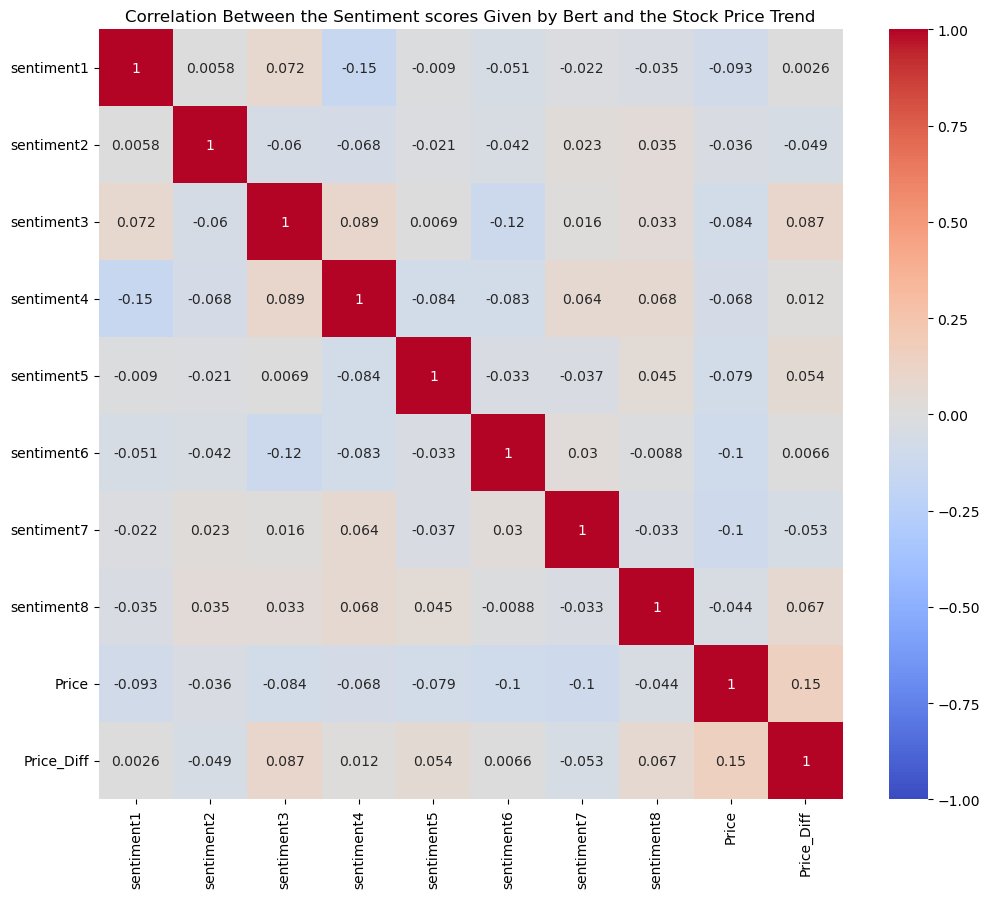

In [3]:
# Plot the heatmap for visulaizing correlation
corr = df_dropped1.corr()
display(corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between the Sentiment scores Given by Bert and the Stock Price Trend')
plt.show()

In [4]:
#Calculate accuracy
from sklearn.metrics import accuracy_score, precision_score
def accuracy_calc(y_test,y_pred):
    y_pred_discrete = np.round(y_pred)
    acc = accuracy_score(y_test, y_pred_discrete)
    report = classification_report(y_test, y_pred_discrete)
    print(report)

    print(f'Accuracy: {acc:.2f}')
    

In [5]:
# function to calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score
def evaluate_model(y_true, y_pred, average_method='macro'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average_method)
    recall = recall_score(y_true, y_pred, average=average_method)
    f1 = f1_score(y_true, y_pred, average=average_method)
    return accuracy, precision, recall, f1

In [6]:
sentences = df_dropped1[['cluster1', 'cluster2', 'cluster3','cluster4','cluster5']].values.tolist()
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1)
word_vectors= [model_w2v.wv[sentence].mean(axis=0) for sentence in sentences]

In [7]:
# Combine word vectors with numeric features
numeric_features = df_dropped1[['sentiment1', 'sentiment2', 'sentiment3','sentiment4','sentiment5']].values
X= pd.concat([pd.DataFrame(word_vectors), pd.DataFrame(numeric_features)], axis=1)

# Target variable

le = LabelEncoder()
y = le.fit_transform(df_dropped1['High_Low'])
# y= df_dropped1['Price']

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Loading dataset which has the clusters created by lda and sentiment score given by VADER Module

C:\Users\dell\AppData\Local\Temp\ipykernel_52280\3809046839.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_dropped2.corr()


,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,sentiment8,Price,Price_Diff
sentiment1,1.000000,-0.095878,0.140176,0.128834,0.131986,0.081967,0.025170,0.106042,-0.065232,-0.047239
sentiment2,-0.095878,1.000000,0.052338,0.015397,-0.031609,-0.002713,0.033355,0.022996,0.009684,-0.011728
sentiment3,0.140176,0.052338,1.000000,0.019428,0.056656,-0.064931,0.018954,0.038309,-0.012524,-0.001834
sentiment4,0.128834,0.015397,0.019428,1.000000,0.031026,-0.163693,0.131098,0.033346,-0.017128,0.017196
sentiment5,0.131986,-0.031609,0.056656,0.031026,1.000000,0.038772,-0.023204,0.150942,0.085790,-0.077499
sentiment6,0.081967,-0.002713,-0.064931,-0.163693,0.038772,1.000000,0.000480,0.169908,0.079945,-0.062184
sentiment7,0.025170,0.033355,0.018954,0.131098,-0.023204,0.000480,1.000000,-0.009356,-0.122121,-0.083821
sentiment8,0.106042,0.022996,0.038309,0.033346,0.150942,0.169908,-0.009356,1.000000,0.073038,0.131078
Price,-0.065232,0.009684,-0.012524,-0.017128,0.085790,0.079945,-0.122121,0.073038,1.000000,0.064144
Price_Diff,-0.047239,-0.011728,-0.001834,0.017196,-0.077499,-0.062184,-0.083821,0.131078,0.064144,1.000000


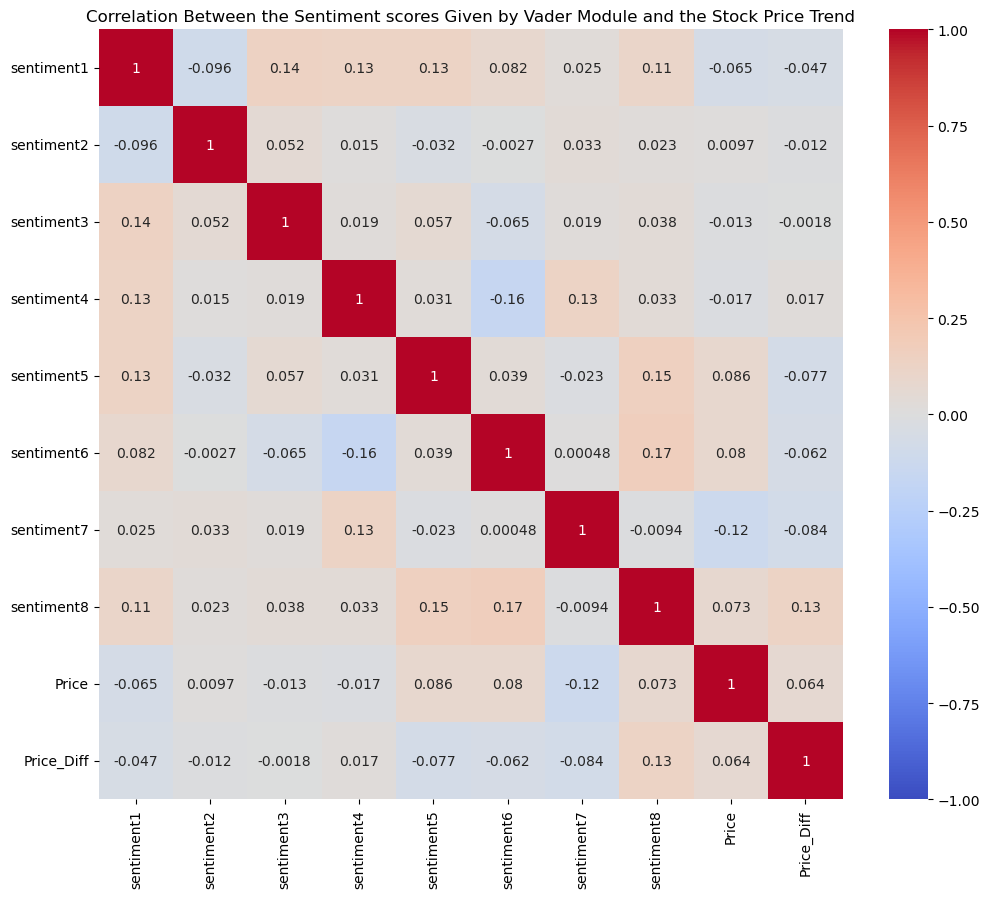

In [9]:
datasenti2 = pd.read_excel('merged_df_final_vader_1_year_8_clusters.xlsx',index_col=0) # Columns: 'word1', 'word2', 'word3', 'word4', 'value1', 'value2', 'value3', 'value4', 'stock_price'


# # Removes the duplicate rows in the dataset and stores it in a new dataframe
# datasenti=datasenti.drop_duplicates()

# # Removes the rows with null values to avoid ambigous results
# datasenti=datasenti.dropna()
# datasenti2
columns_to_drop2 = ['Open', 'High','Low','Vol.','Change %']
df_dropped2 = datasenti2.drop(columns=columns_to_drop2)
df_dropped2=df_dropped2.dropna()
df_dropped2['High_Low'] = df_dropped2['Price_Diff'].apply(
    lambda x: 'VeryHigh' if x > 150 
             else ('High' if x > 40 
                   else ('Low' if x > 0 
                         else 'VerLow'))
)
# df_dropped['Price'] = df_dropped['Price'].str.replace(',', '').astype(float)
# df_dropped2



corr2 = df_dropped2.corr()
display(corr2)
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between the Sentiment scores Given by Vader Module and the Stock Price Trend')
plt.show()

# subset_df = df_dropped1.iloc[:365]
# subset_df

## RandomForestRegressor
sentences2 = df_dropped2[['cluster1', 'cluster2', 'cluster3','cluster4','cluster5']].values.tolist()
model_w2v2 = Word2Vec(sentences2, vector_size=100, window=5, min_count=1)
word_vectors2= [model_w2v2.wv[sentence].mean(axis=0) for sentence in sentences2]
# Combine word vectors with numeric features
numeric_features2 = df_dropped2[['sentiment1', 'sentiment2', 'sentiment3','sentiment4','sentiment5']].values
X2= pd.concat([pd.DataFrame(word_vectors2), pd.DataFrame(numeric_features2)], axis=1)

# Target variable

le2 = LabelEncoder()
y2 = le2.fit_transform(df_dropped2['High_Low'])
# y= df_dropped1['Price']
# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

## RandomForestRegressor

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [13]:
accuracy_calc(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67        33
           2       0.39      0.41      0.40        17

    accuracy                           0.57        51
   macro avg       0.35      0.36      0.36        51
weighted avg       0.56      0.57      0.56        51

Accuracy: 0.57


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Regressor
model_rand_classi = RandomForestClassifier(random_state=42)
model_rand_classi.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predict and evaluate
y_pred_rand_classi = model_rand_classi.predict(X_test)


In [16]:
accuracy_calc(y_test,y_pred_rand_classi)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.73      0.67        33
           2       0.25      0.18      0.21        17

    accuracy                           0.53        51
   macro avg       0.29      0.30      0.29        51
weighted avg       0.48      0.53      0.50        51

Accuracy: 0.53


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model_logireg = LogisticRegression(max_iter=1000)
model_logireg.fit(X_train, y_train)
y_pred_logireg = model_logireg.predict(X_test)


In [18]:
accuracy_calc(y_test,y_pred_logireg)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.59      0.52      0.55        33
           2       0.27      0.35      0.31        17

    accuracy                           0.45        51
   macro avg       0.29      0.29      0.29        51
weighted avg       0.47      0.45      0.46        51

Accuracy: 0.45


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)


In [20]:
accuracy_calc(y_test,y_pred_svc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.66      0.88      0.75        33
           2       0.43      0.18      0.25        17

    accuracy                           0.63        51
   macro avg       0.36      0.35      0.33        51
weighted avg       0.57      0.63      0.57        51

Accuracy: 0.63


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## K-Nearest Neighbors (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


In [22]:
accuracy_calc(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.52      0.48      0.50        33
           2       0.10      0.12      0.11        17

    accuracy                           0.35        51
   macro avg       0.21      0.20      0.20        51
weighted avg       0.37      0.35      0.36        51

Accuracy: 0.35


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Gradient Boosting Machines (GBM):

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)
y_pred_gbm = model_gbm.predict(X_test)


In [24]:
accuracy_calc(y_test,y_pred_gbm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.68      0.64      0.66        33
           2       0.40      0.47      0.43        17

    accuracy                           0.57        51
   macro avg       0.36      0.37      0.36        51
weighted avg       0.57      0.57      0.57        51

Accuracy: 0.57


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Neural Networks (using sklearn's MLPClassifier)

In [25]:
from sklearn.neural_network import MLPClassifier

model_neural = MLPClassifier(max_iter=1000)
model_neural.fit(X_train, y_train)
y_pred_neural = model_neural.predict(X_test)


In [26]:
accuracy_calc(y_test,y_pred_neural)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.64      0.55      0.59        33
           2       0.35      0.47      0.40        17

    accuracy                           0.51        51
   macro avg       0.33      0.34      0.33        51
weighted avg       0.53      0.51      0.52        51

Accuracy: 0.51


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Decision Trees:

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_deci_tree = DecisionTreeClassifier()
model_deci_tree.fit(X_train, y_train)
y_pred_deci_tree = model_deci_tree.predict(X_test)


In [28]:
accuracy_calc(y_test,y_pred_deci_tree)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      0.67      0.70        33
           2       0.48      0.59      0.53        17

    accuracy                           0.63        51
   macro avg       0.40      0.42      0.41        51
weighted avg       0.63      0.63      0.63        51

Accuracy: 0.63


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Visualisation of Models Accuracy

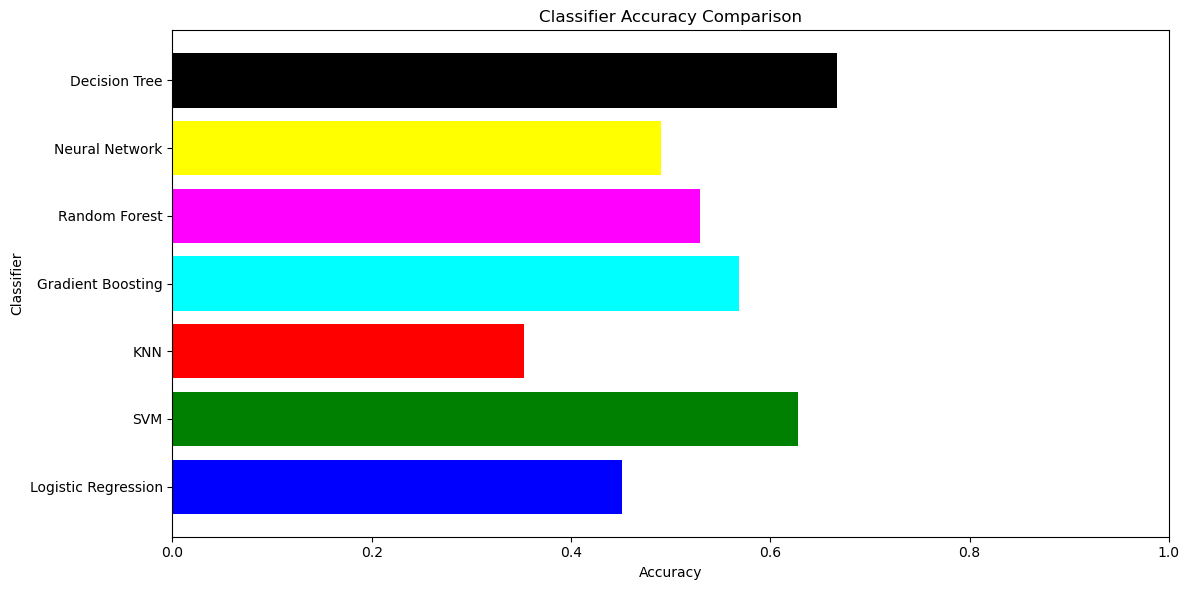

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize all the classifiers with default parameters (or any preferred settings)
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier()
}

# Train, predict, and store accuracy for each classifier
accuracies = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    _pred_discrete = np.round(y_pred)
    accuracies[name] = accuracy_score(y_test, _pred_discrete)

# Visualize the accuracies
names = list(accuracies.keys())
values = list(accuracies.values())

plt.figure(figsize=(12, 6))
plt.barh(names, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
plt.tight_layout()
plt.show()


## Performance Metrics of all the models

In [30]:
def models_accuracy(X_train, X_test, y_train, y_test):    # Define the models
    models = {
        "RandomForestClassifier": RandomForestClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "SVM": SVC(),
        # "KNN": KNeighborsClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "DecisionTree": DecisionTreeClassifier()
    }

    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': []
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred, 'macro')

        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1'].append(f1)

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)
    return df_results
df1=models_accuracy(X_train, X_test, y_train, y_test)
# Display the results in a tabular format
print("Performance Metrics of models using sentiment score given by BERT")
display(df1)

c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics of models using sentiment score given by BERT


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.607843,0.374405,0.379679,0.376708
1,LogisticRegression,0.450980,0.286311,0.289364,0.285360
2,SVM,0.627451,0.362554,0.351753,0.334416
3,GradientBoosting,0.588235,0.376190,0.388592,0.380117
4,DecisionTree,0.627451,0.424383,0.446821,0.419192


In [31]:

df2=models_accuracy(X_train2, X_test2, y_train2, y_test2)
# Display the results in a tabular format
print("Performance Metrics of models using sentiment score given by VADER module")
display(df2)

c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics of models using sentiment score given by VADER module


c:\Users\dell\anaconda3\envs\dissert_20230828\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.450980,0.150327,0.333333,0.207207
1,LogisticRegression,0.450980,0.150327,0.333333,0.207207
2,SVM,0.450980,0.150327,0.333333,0.207207
3,GradientBoosting,0.313725,0.173077,0.187888,0.162903
4,DecisionTree,0.490196,0.464972,0.446170,0.444487


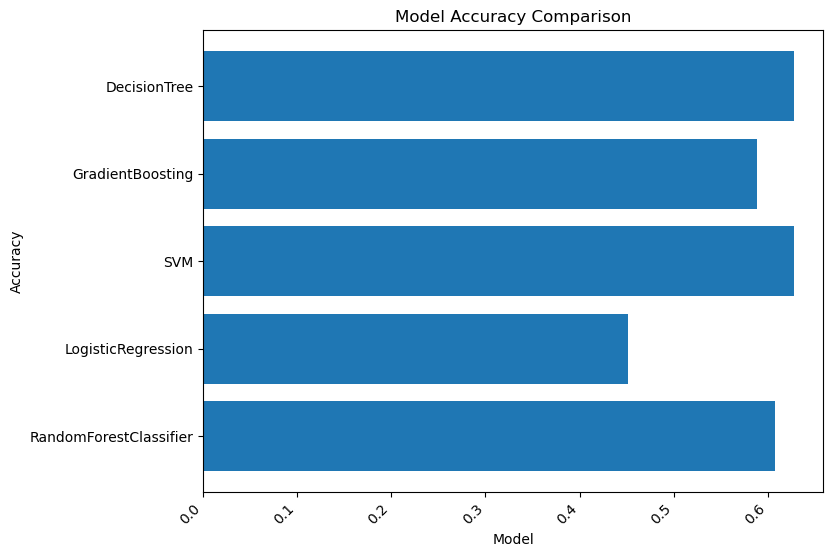

In [32]:
plt.figure(figsize=(8, 6))
plt.barh(df1['Model'], df1['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

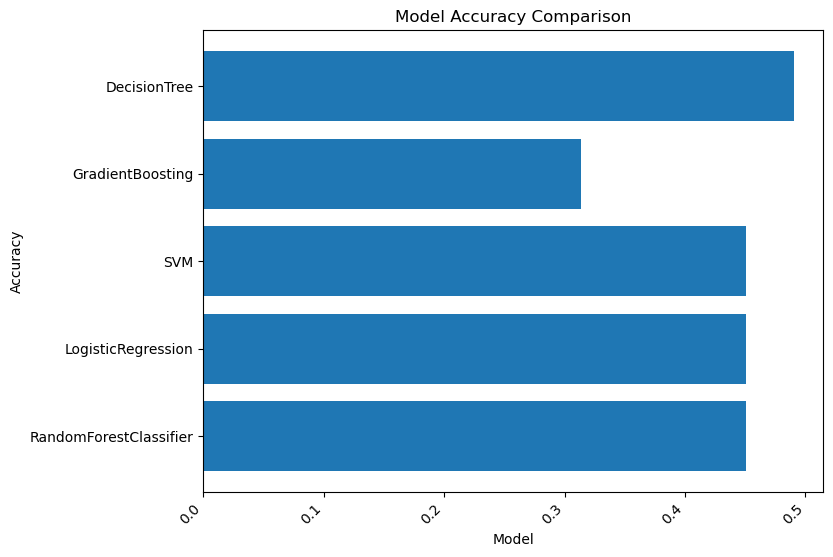

In [33]:
plt.figure(figsize=(8, 6))
plt.barh(df2['Model'], df2['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

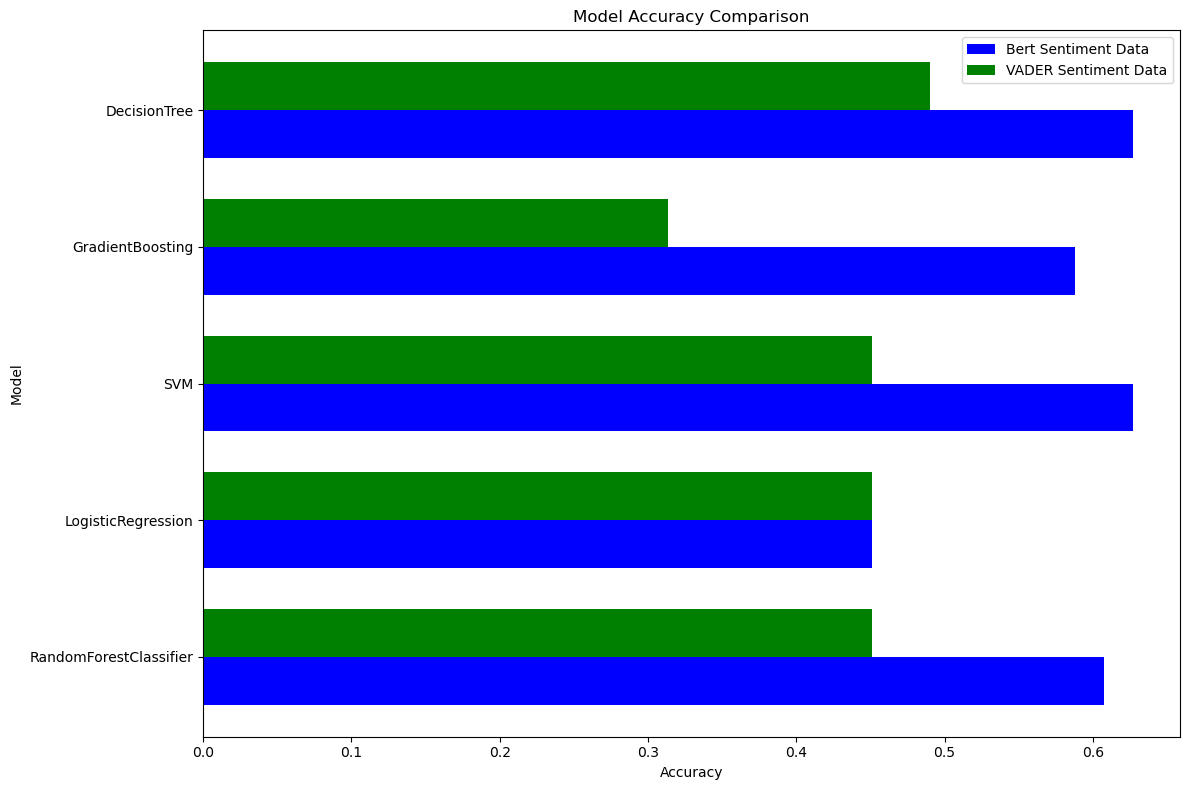

In [34]:
import numpy as np

bar_width = 0.35
index = np.arange(len(df1['Model']))

plt.figure(figsize=(12, 8))

bar1 = plt.barh(index, df1['Accuracy'], bar_width, label='Bert Sentiment Data', color='blue')
bar2 = plt.barh(index + bar_width, df2['Accuracy'], bar_width, label='VADER Sentiment Data', color='green')

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.yticks(index + bar_width / 2, df1['Model'])  # positioning the model names in the middle of the grouped bars
plt.legend()
plt.tight_layout()

plt.show()


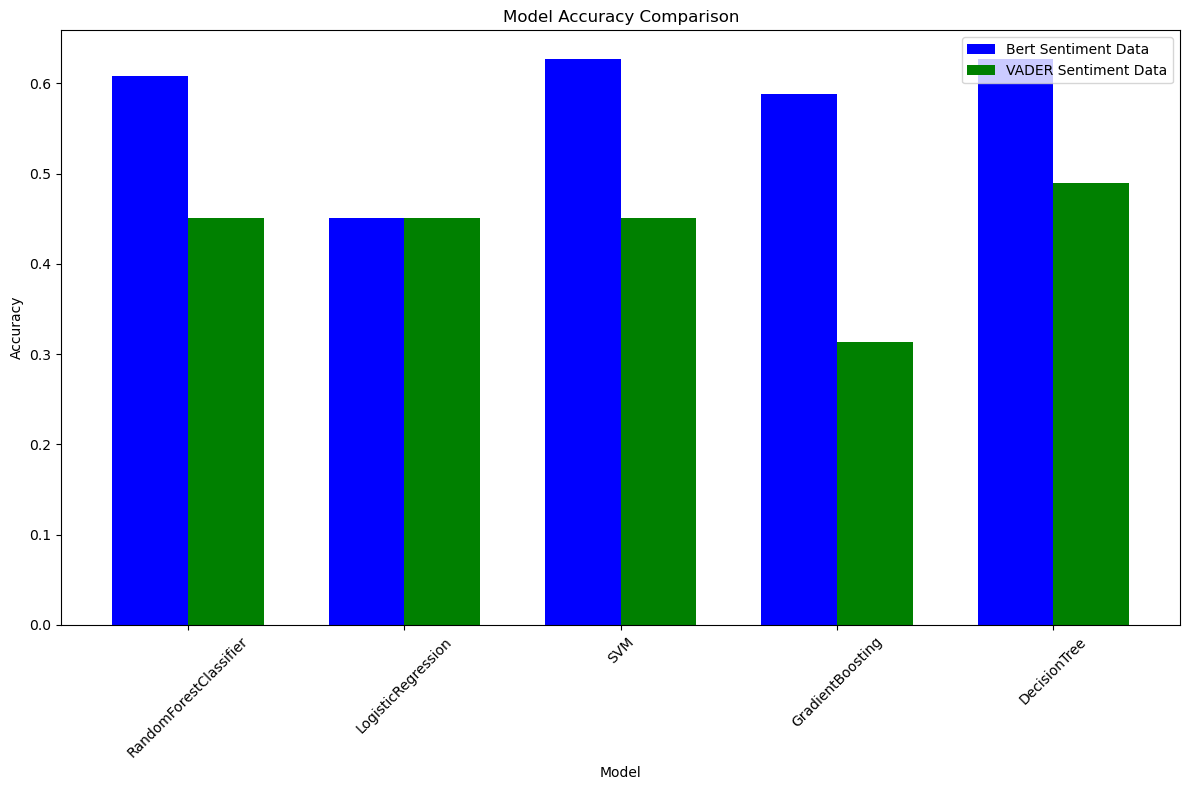

In [35]:
bar_width = 0.35
index = np.arange(len(df1['Model']))

plt.figure(figsize=(12, 8))

bar1 = plt.bar(index, df1['Accuracy'], bar_width, label='Bert Sentiment Data', color='blue')
bar2 = plt.bar(index + bar_width, df2['Accuracy'], bar_width, label='VADER Sentiment Data', color='green')

plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracy Comparison')
plt.xticks(index + bar_width / 2, df1['Model'], rotation=45)  # positioning the model names in the middle of the grouped bars
plt.legend()
plt.tight_layout()

plt.show()

In [36]:
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
# colors = ['blue', 'green', 'red', 'cyan']

# bar_width = 0.2
# index = np.arange(len(df1['Model']))

# plt.figure(figsize=(15, 8))

# # Nested loop to plot bars for each metric in both dataframes
# for i, metric in enumerate(metrics):
#     plt.bar(index + i * bar_width, df1[metric], bar_width, label=f'DF1 {metric}', color=colors[i])
#     plt.bar(index + i * bar_width + len(metrics) * bar_width / 2, df2[metric], bar_width, label=f'DF2 {metric}', color=colors[i], hatch="//")

# plt.xlabel('Model')
# plt.ylabel('Score')
# plt.title('Model Metric Comparison')
# plt.xticks(index + len(metrics) * bar_width / 2, df1['Model'], rotation=45)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

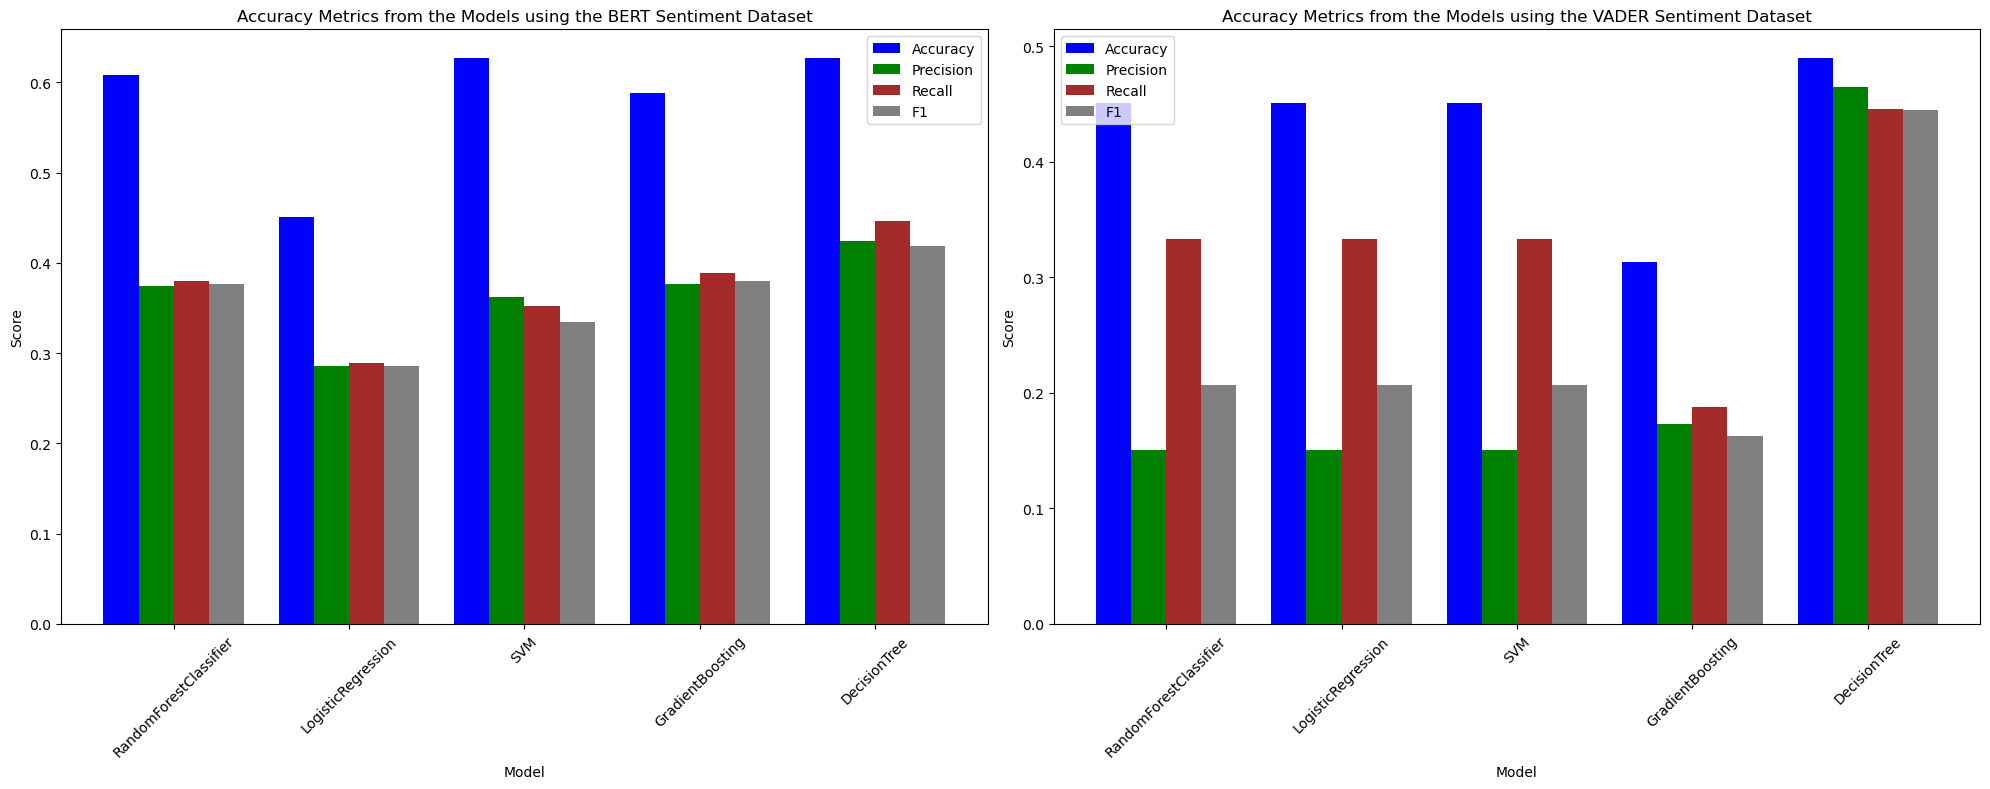

In [37]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
colors = ['blue', 'green', 'brown', 'grey']
bar_width = 0.2
index = np.arange(len(df1['Model']))

plt.figure(figsize=(20, 8))

# Plot for df1
plt.subplot(1, 2, 1) # This means 1 row, 2 columns, and we are now plotting the first column

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, df1[metric], bar_width, label=metric, color=colors[i])

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy Metrics from the Models using the BERT Sentiment Dataset')
plt.xticks(index + 1.5 * bar_width, df1['Model'], rotation=45)
plt.legend()
plt.tight_layout()

# Plot for df2
plt.subplot(1, 2, 2) # This means 1 row, 2 columns, and we are now plotting the second column

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, df2[metric], bar_width, label=metric, color=colors[i])

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy Metrics from the Models using the VADER Sentiment Dataset')
plt.xticks(index + 1.5 * bar_width, df2['Model'], rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

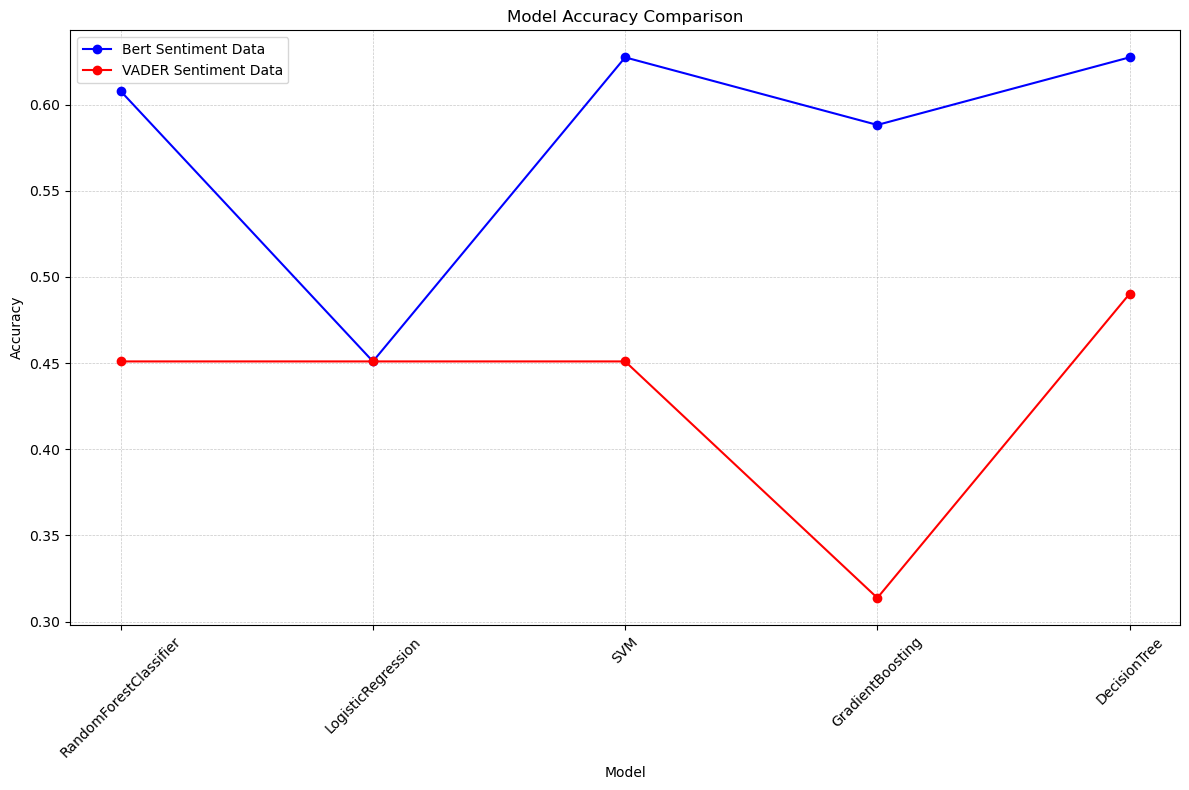

In [38]:
index = np.arange(len(df1['Model']))

plt.figure(figsize=(12, 8))

# Line plot for df1
plt.plot(index, df1['Accuracy'], marker='o', linestyle='-', color='blue', label='Bert Sentiment Data')

# Line plot for df2
plt.plot(index, df2['Accuracy'], marker='o', linestyle='-', color='red', label='VADER Sentiment Data')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(index, df1['Model'], rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()